## Geodesic Distances

Using the [fdasrsf](https://fdasrsf-python.readthedocs.io/en/latest/) library, we compute the geodesic distances between pairs of open curves.

#### Imports / Functions

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import tqdm
from fdasrsf.geodesic import geod_sphere

In [2]:
def rescale_shell(x,y,v=3,same=False):
    # Code to scale a curve so that it lies between +-v/2 (default: 1.5) in both axes.
    
    p = max(max(y)-min(y),max(x)-min(x))
    if same == True:
        p = max(y)-min(y)
    q = p/v
    x_ = x/q
    y_ = y/q
    mp = min(x_)+(max(x_)-min(x_))/2
    x_ = x_-mp
    mp = min(y_)+(max(y_)-min(y_))/2
    y_ = y_-mp
    return x_,y_

#### Process Data

In [4]:
pth = "C:\\Users\\arian\\Documents\\GitHub\\distances.csv"
table = pd.read_csv(pth,header=None)

In [5]:
all_points = []
n = len(table)
print("n: "+str(n))
for j in range(0,n):
    coords = list(table.T[j])
    x = []
    y = []
    for i in range(0,len(coords)):
        if i%2 == 0:
            x.append(coords[i])
        else:
            y.append(coords[i])
            
    x,y = rescale_shell(np.array(x)[:-1],np.array(y)[:-1])

    F = np.column_stack((x,y)).T 
    all_points.append(F)

n: 440


#### Pairwise Distances

In [7]:
distances_DP = np.zeros((n,n))
errors = []

for i in tqdm.tqdm(range(0,n)):
    x1 = all_points[i][0]
    y1 = all_points[i][1]
    beta1 = np.column_stack([x1,y1]).T

    for j in range(i+1,n):
        x2 = all_points[j][0]
        y2 = all_points[j][1]
        
        beta2 = np.column_stack([x2,y2]).T
        
        try:
            d,_,_, = geod_sphere(beta1, beta2)
        except:
            try:
                d,_,_, = geod_sphere(beta2, beta1)
            except:
                print("Error for contours "+str(i)+" and "+str(j))
                errors.append([i,j])
                d = 100000
                
        distances_DP[i,j] = d
        distances_DP[j,i] = d
        
    pd.DataFrame(distances_DP).to_csv('Open_dists.csv')


print("Computed distances between "+str(n)+" contours, with "+str(len(errors))+" errors.")

100%|████████████████████████████████████████████████████████████████████████████| 440/440 [00:00<00:00, 440031.89it/s]

Computed distances between 440 contours, with 0 errors.


#### Saving Distances

In [8]:
dfInd = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\Index.csv")
names = list(dfInd['Name'])
df = pd.DataFrame(distances_DP)

df.columns = names
df.index = names
df.index.name = 'Name'
df.to_csv('Open_Distances.csv')

In [3]:
df = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\Ancestral_Vases.csv")

In [4]:
x1 = list(df['x1'])[:-1]
y1 = list(df['y1'])[:-1]


x1,y1 = rescale_shell(np.array(x1),np.array(y1))
x1 = list(x1)
y1 = list(y1)

beta1 = np.column_stack([x1,y1]).T
x2 = list(df['x2'])[:-1]
y2 = list(df['y2'])[:-1]


beta2 = np.column_stack([x2,y2]).T


d,_pths,_, = geod_sphere(beta1, beta2)
print(np.round(d,5))

pths_v = deepcopy(_pths)

0.29349


In [67]:
len(x1_)

200

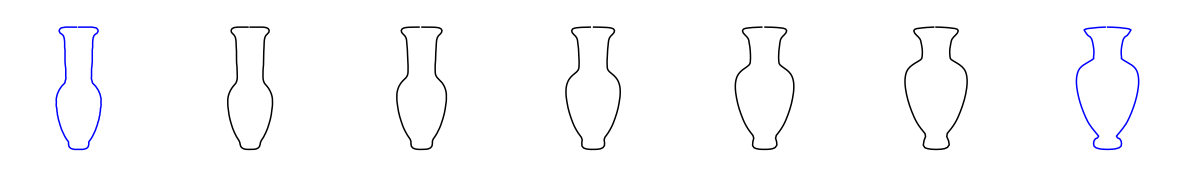

In [17]:
splits = 5

fig,ax = plt.subplots(1,splits+2,figsize=(3*(splits+2),3))

ax[0].plot(x1,y1,'-b')
ax[-1].plot(x2,y2,'-b')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y)
    ax[i+1].plot(x,y,'-k')
    
for i in range(0,splits+2):
    ax[i].axis('off')
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-2,2])

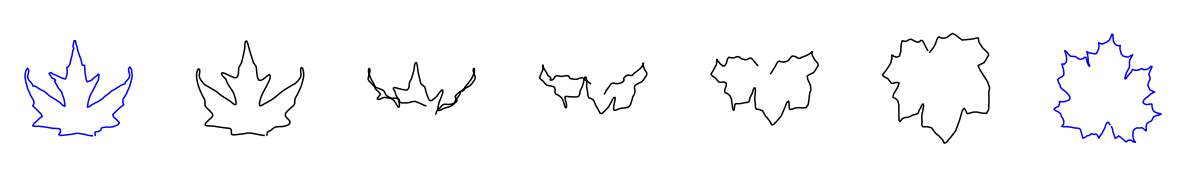

In [21]:
splits = 5

fig,ax = plt.subplots(1,splits+2,figsize=(3*(splits+2),3))

ax[0].plot(x1,y1,'-b')
ax[-1].plot(x2,y2,'-b')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y)
    ax[i+1].plot(x,y,'-k')
    
for i in range(0,splits+2):
    ax[i].axis('off')
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-2,2])

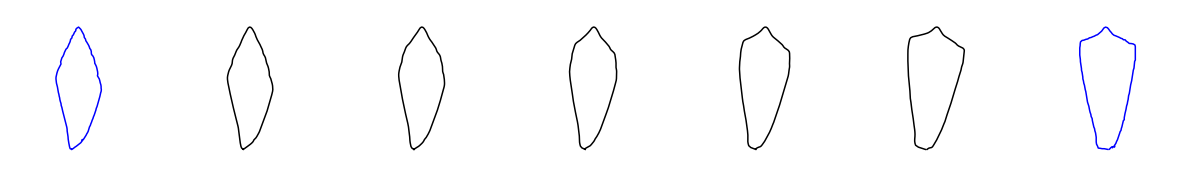

In [89]:
splits = 5

fig,ax = plt.subplots(1,splits+2,figsize=(3*(splits+2),3))

ax[0].plot(x1,y1,'-b')
ax[-1].plot(x2,y2,'-b')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y)
    ax[i+1].plot(x,y,'-k')
    
for i in range(0,splits+2):
    ax[i].axis('off')
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-2,2])

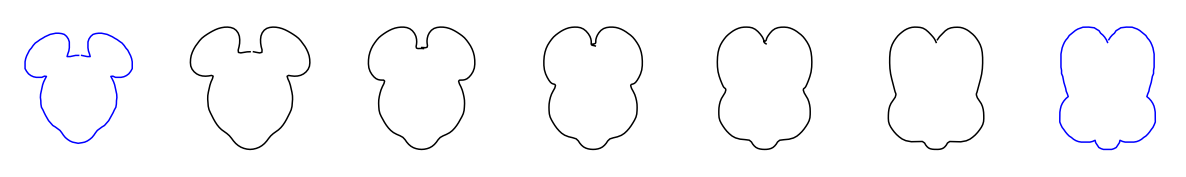

In [85]:
splits = 5

fig,ax = plt.subplots(1,splits+2,figsize=(3*(splits+2),3))

ax[0].plot(x1,y1,'-b')
ax[-1].plot(x2,y2,'-b')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y,same=True)
    ax[i+1].plot(x,y,'-k')
    
for i in range(0,splits+2):
    ax[i].axis('off')
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-2,2])

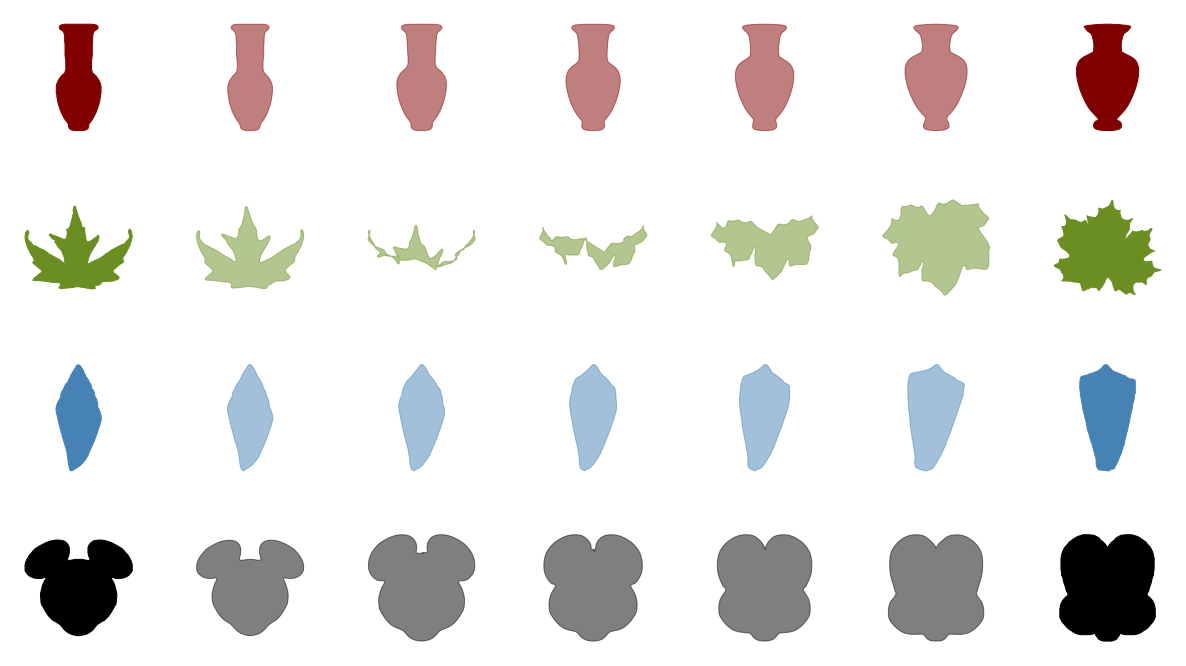

In [12]:
df = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\Ancestral_Vases.csv")

x1 = list(df['x1'])[:-1]
y1 = list(df['y1'])[:-1]


x1,y1 = rescale_shell(np.array(x1),np.array(y1))
x1 = list(x1)
y1 = list(y1)

beta1 = np.column_stack([x1,y1]).T
x2 = list(df['x2'])[:-1]
y2 = list(df['y2'])[:-1]


beta2 = np.column_stack([x2,y2]).T


d,_pths,_, = geod_sphere(beta1, beta2)

splits = 5

fig,ax = plt.subplots(4,splits+2,figsize=(3*(splits+2),4*3))

ax[0,0].fill(x1,y1,color='maroon')
ax[0,-1].fill(x2,y2,color='maroon')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y)
    ax[0,i+1].fill(x,y,color='maroon',alpha=0.5)
    
for i in range(0,splits+2):
    ax[0,i].axis('off')
    ax[0,i].set_xlim([-2,2])
    ax[0,i].set_ylim([-2,2])
    
    
df = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\Miocene.csv")
    
    
    
    
x1 = list(df['x1'])[:-1]
y1 = list(df['y1'])[:-1]


x1,y1 = rescale_shell(np.array(x1),np.array(y1))
x1 = list(x1)
y1 = list(y1)

beta1 = np.column_stack([x1,y1]).T
x2 = list(df['x2'])[:-1]
y2 = list(df['y2'])[:-1]


beta2 = np.column_stack([x2,y2]).T


d,_pths,_, = geod_sphere(beta1, beta2)




ax[1,0].fill(x1,y1,color='olivedrab')
ax[1,-1].fill(x2,y2,color='olivedrab')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y)
    ax[1,i+1].fill(x,y,color='olivedrab',alpha=0.5)
    
for i in range(0,splits+2):
    ax[1,i].axis('off')
    ax[1,i].set_xlim([-2,2])
    ax[1,i].set_ylim([-2,2])
    
    
df = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\Conus.csv")

    
x1 = list(df['x1'])[:-1]
y1 = list(df['y1'])[:-1]


x1,y1 = rescale_shell(np.array(x1),np.array(y1))
x1 = list(x1)
y1 = list(y1)

beta1 = np.column_stack([x1,y1]).T
x2 = list(df['x2'])[:-1]
y2 = list(df['y2'])[:-1]


beta2 = np.column_stack([x2,y2]).T


d,_pths,_, = geod_sphere(beta1, beta2)




ax[2,0].fill(x1,y1,color='steelblue')
ax[2,-1].fill(x2,y2,color='steelblue')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y)
    ax[2,i+1].fill(x,y,color='steelblue',alpha=0.5)
    
for i in range(0,splits+2):
    ax[2,i].axis('off')
    ax[2,i].set_xlim([-2,2])
    ax[2,i].set_ylim([-2,2])
    
    
df = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\Mickey_Tiki_Closed.csv")
   
    
    
x1 = list(df['x1'])[:-1]
y1 = list(df['y1'])[:-1]


x1,y1 = rescale_shell(np.array(x1),np.array(y1))
x1 = list(x1)
y1 = list(y1)

beta1 = np.column_stack([x1,y1]).T
x2 = list(df['x7'])[:-1]
y2 = list(df['y7'])[:-1]


beta2 = np.column_stack([x2,y2]).T


d,_pths,_, = geod_sphere(beta1, beta2)




ax[3,0].fill(x1,y1,color='k')
ax[3,-1].fill(x2,y2,color='k')

for i in range(0,splits):
    x = _pths[0,:,i]
    y = _pths[1,:,i]
    x,y = rescale_shell(x,y)
    ax[3,i+1].fill(x,y,color='k',alpha=0.5)
    
for i in range(0,splits+2):
    ax[3,i].axis('off')
    ax[3,i].set_xlim([-2,2])
    ax[3,i].set_ylim([-2,2])
    
    
plt.savefig('Transformations_Open_Example.pdf',dpi=600,bbox_inches='tight',pad_inches=0.25)


In [6]:
import matplotlib.pyplot as plt